We have already seen in the previous example the k-means algorithm
In order for the k-mean algorithm to work we need the variance difference of the clusters to be low and that the clusters have to be isotropic

This means that they will have a spherical shape

https://scikit-learn.org/stable/

Lets see this in practice:

<AxesSubplot:>

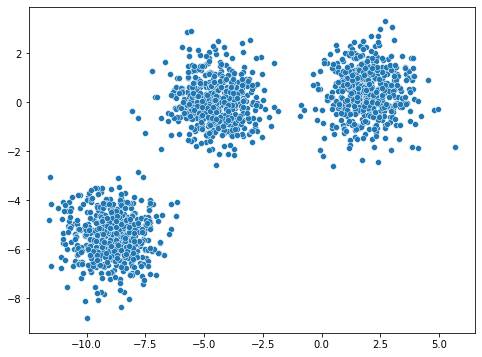

In [1]:
# Create 3 isotropic clusters
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

n_samples = 1500
random_state = 170
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1])

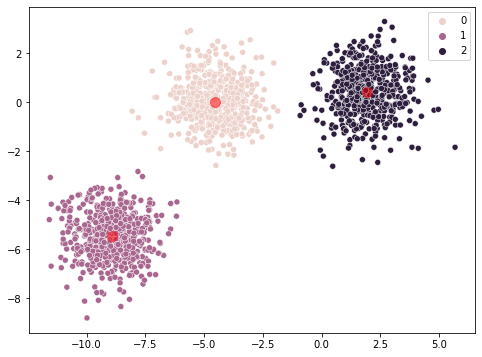

In [2]:
# Using k-means:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=100, alpha=0.5)

We can see that the k-means algorithm works perfectly

<AxesSubplot:>

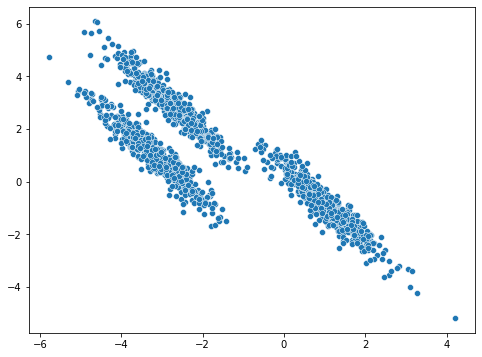

In [3]:
# Isotropic clusters:

import numpy as np

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1])

Note we have only change the data to isotropic and have not affected the variance:



In [4]:
X_aniso.std(axis=0)

array([2.02019173, 1.86325317])

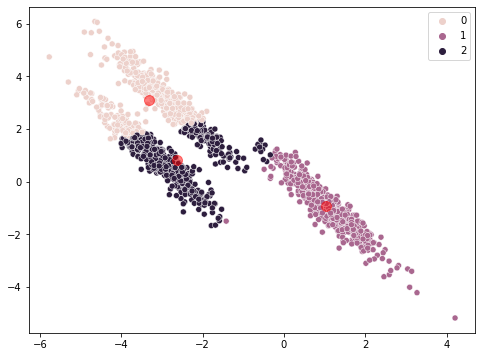

In [5]:
# Running k-means
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso)
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=100, alpha=0.5)

We can see that the k-means algorithm has not performed to its best.

This is because the k-means alogrorithm expands spherically 

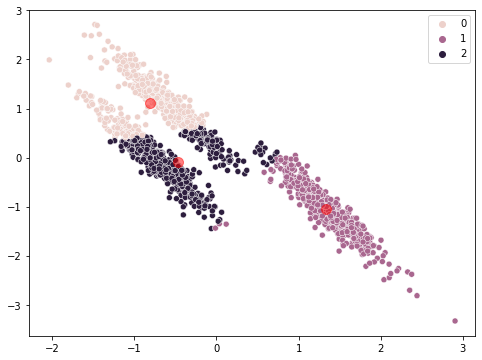

In [6]:
# Using now Standard Scalar to check if there is a difference
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_aniso_scaled = standard_scaler.fit_transform(X_aniso)
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_aniso_scaled)
sns.scatterplot(x=X_aniso_scaled[:, 0], y=X_aniso_scaled[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=100, alpha=0.5)

We can see still that the k-means algorithm does not work correctly.

As a result we must conclude that we need to use a different algorithm - Gaussian Mixture Model

In [8]:
# Using Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full', max_iter=20, 
                      random_state=0)
y_pred = gmm.fit_predict(X_aniso)

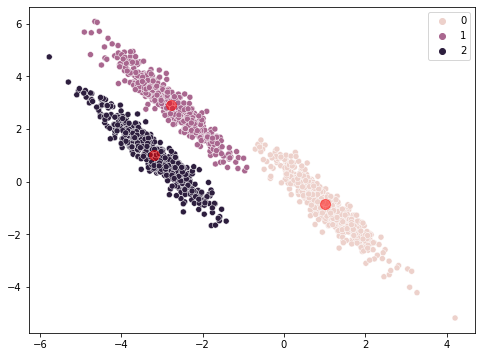

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, alpha=0.5)

We can see now that the Gaussian Mixture Model works fine and it was able to find out the clusters that we want

Another example is when the data are convex

<AxesSubplot:>

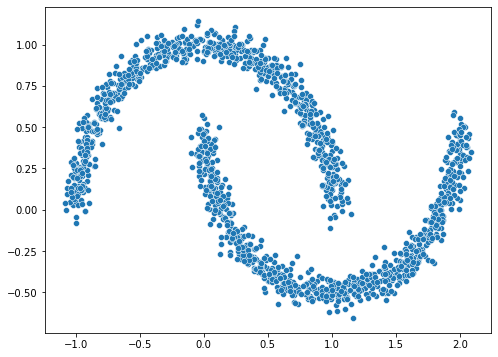

In [10]:
from sklearn.datasets import make_moons

plt.figure(figsize=(8, 6))
X_moons, _ = make_moons(n_samples=1500, noise=.05)
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1])

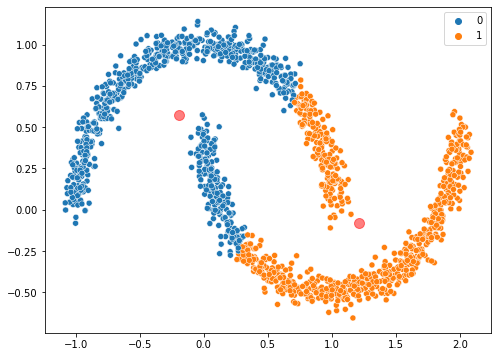

In [11]:
# Using k-means:
plt.figure(figsize=(8, 6))
kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred = kmeans.fit_predict(X_moons)
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, alpha=0.5)

Not acceptable results

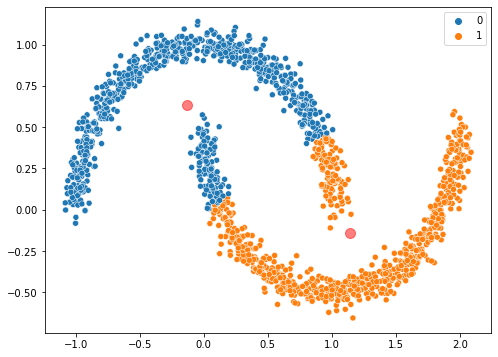

In [13]:
# Using Gaussian Mixture Model:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full', max_iter=20, 
                      random_state=0)
y_pred = gmm.fit_predict(X_moons)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, alpha=0.5)

Not applicable either

Hence in this specific case we have to use a diffrent method called spectral clustering:

https://en.wikipedia.org/wiki/Spectral_clustering

In [14]:
from sklearn.cluster import SpectralClustering

scm = SpectralClustering(n_clusters=2, 
                         affinity='nearest_neighbors',
                         n_neighbors=10,
                         n_init=20,
                         assign_labels='kmeans',
                         random_state=0)
y_pred = scm.fit_predict(X_moons)

C:\Users\Pelop\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<AxesSubplot:>

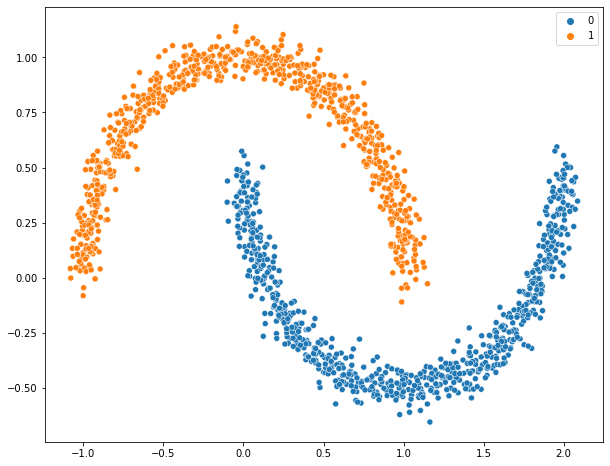

In [15]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_pred)

Hence this spetral clustering method is the most applicable for this convex data

Note:

Scikit-Learn have other stable methods --> more can be found using the top link